# Aleatorio

Vamos a crear instancias aleatorias y correr el algoritmo. Veamos cual es mejor en el caso promedio :D

In [41]:
!rm -rf ../instancias/aleatorio # borra la carpeta
!mkdir ../instancias/aleatorio # crea la carpeta para instancias aleatorias

`gen` es un generador de instancias

In [42]:
import numpy as np

def gen(
    k = 100,
    _R = (500, 1000),
    n = 10,
    _w = (1, 100),
    _r = (800, 1000),
    _path = "../instancias/aleatorio/{}_{}.in"
):
    for i in range(k):
        R = np.random.randint((_R[1] - _R[0])) + _R[0]
        w = np.random.randint((_w[1] - _w[0]), size = n) + _w[0]
        r = np.random.randint((_r[1] - _r[0]), size = n) + _r[0]

        f = open(_path.format(n, i), "x")
        f.write("{} {}\n".format(n, R))
        for i in range(n-1):
            f.write("{} {}\n".format(w[i], r[i]))
        f.write("{} {}".format(w[n-1], r[n-1]))
        f.close()

Vamos a variar $n$ de 1 a 1000, de 5 en 5.

In [43]:
ns = np.arange(1, 30, 1)
_k = 3

In [44]:
for i in ns:
    gen(n = i, k = _k)

In [45]:
import time
import os

path = "../instancias/aleatorio/1_0.in"

os.system("g++ ../src/main.cpp -o ../bin/algo3-tp1")

perf_fb = []
perf_bt = []
perf_pd = []

for i in ns:
    el_fb = 0
    el_bt = 0
    el_pd = 0

    for j in range(_k):
        #start = time.time()
        #os.system("./../bin/algo3-tp1 ../instancias/aleatorio/{}_{}.in 1 0".format(i, j))
        #el_fb += time.time() - start

        start = time.time()
        os.system("./../bin/algo3-tp1 ../instancias/aleatorio/{}_{}.in 2 0".format(i, j))
        el_bt += time.time() - start

        start = time.time()
        os.system("./../bin/algo3-tp1 ../instancias/aleatorio/{}_{}.in 3 0".format(i, j))
        el_pd += time.time() - start 

        
    perf_fb.append(el_fb / _k)
    perf_bt.append(el_bt / _k)
    perf_pd.append(el_pd / _k)


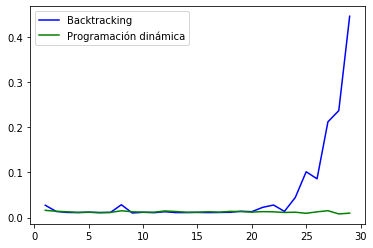

In [46]:
import matplotlib.pyplot as plt

# Plot the data
#plt.plot(ns, perf_fb, color = 'red', label = "Fuerza Bruta")
plt.plot(ns, perf_bt, color = 'blue', label = "Backtracking")
plt.plot(ns, perf_pd, color = 'green', label = "Programación dinámica")

plt.legend()

# Show the plot
plt.show()